In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv',
                 parse_dates = ["tpep_pickup_datetime","tpep_dropoff_datetime"],
                 index_col = "VendorID" #indexcoulmn
                 )
print(df.head())

         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
1         2017-10-01 00:01:50   2017-10-01 00:14:13                1   
1         2017-10-01 00:02:43   2017-10-01 00:08:35                2   
1         2017-10-01 00:12:08   2017-10-01 00:25:49                3   
2         2017-10-01 00:00:25   2017-10-01 00:11:24                1   
2         2017-10-01 00:15:30   2017-10-01 00:25:11                1   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
1                  2.00           1                  N           142   
1                  2.30           1                  N           142   
1                  2.80           1                  N           151   
2                  1.97           1                  N           100   
2                  2.17           1                  N         

In [10]:
print(df.describe())

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     9.768815e+06   9.768815e+06  9.768815e+06  9.768815e+06   
mean      1.617468e+00   2.964095e+00  1.045011e+00  1.630937e+02   
std       1.259104e+00   3.814063e+00  4.748632e-01  6.624797e+01   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.000000e+00  1.000000e+00  1.140000e+02   
50%       1.000000e+00   1.650000e+00  1.000000e+00  1.620000e+02   
75%       2.000000e+00   3.070000e+00  1.000000e+00  2.330000e+02   
max       9.000000e+00   1.178600e+03  9.900000e+01  2.650000e+02   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  9.768815e+06  9.768815e+06  9.768815e+06  9.768815e+06  9.768815e+06   
mean   1.612835e+02  1.328251e+00  1.338078e+01  3.300792e-01  4.972671e-01   
std    7.015271e+01  4.901289e-01  3.078552e+02  4.644125e-01  1.177005e-01   
min    1.000000e+00  1.000000e+00 -4.600000e+02 -5.800000e+01 

In [11]:
print(df.dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


In [28]:

def det_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - IQR * 1.5
    upper_lim = Q3 + IQR * 1.5
    print("Lower limit {} = {}".format(column,lower_lim))
    print("Upperr limit {} = {}".format(column,upper_lim))
    return(lower_lim,upper_lim)

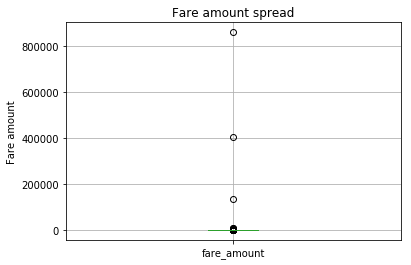

In [29]:
df.boxplot(column='fare_amount')
plt.title('Fare amount spread')
plt.ylabel('Fare amount')
plt.show()

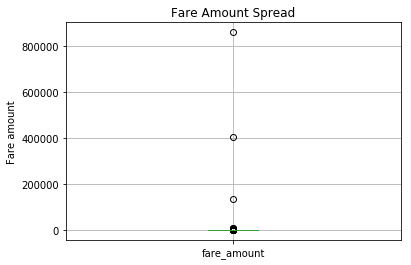

In [30]:
#Fare amount less than 0
print('The minimum fare_amount = {}'.format(df['fare_amount'].min()))


The minimum fare_amount = -460.0


In [31]:
#All such fare amounts
print('The amount of fare_amount that are 0 or less = {}'.format(len(df.loc[df['fare_amount'] <= 0.0])))

The amount of fare_amount that are 0 or less = 7491


In [32]:
#Fare amount max
print('The maximum fare_amount = {}'.format(df['fare_amount'].max()))

The maximum fare_amount = 861602.44


In [33]:
#defining the limits
fare_lower_lim, fare_upper_lim = det_outliers(df, 'fare_amount')

Lower limit fare_amount = -6.25
Upperr limit fare_amount = 27.75


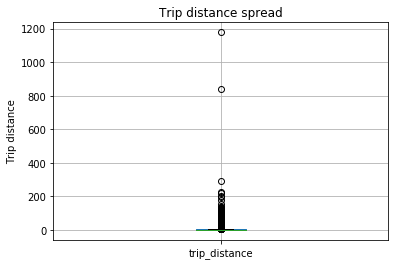

In [34]:
#Tripdistance
df.boxplot(column='trip_distance')
plt.title('Trip distance spread')
plt.ylabel('Trip distance')
plt.show()

In [35]:
#Trip distance less than 0
print('The minimum trip distance = {}'.format(df['trip_distance'].min()))

The minimum trip distance = 0.0


In [36]:
#All such trips
print('The number of trips having distances less than 0 = {}'.format(len(df.loc[df['trip_distance'] <= 0])))

The number of trips having distances less than 0 = 65200


In [37]:
#Trips that are abnormally high
print('The max trip distance = {}'.format(df['trip_distance'].max()))

The max trip distance = 1178.6


In [38]:
#defining the limit
trip_lower_lim,trip_upper_lim = det_outliers(df,'trip_distance')

Lower limit trip_distance = -2.105
Upperr limit trip_distance = 6.175


In [39]:
#removing inconsistency in fare amount
df = df.loc[(df['fare_amount']<fare_upper_lim) & (df['fare_amount']>fare_lower_lim) & (df['fare_amount']>0)]

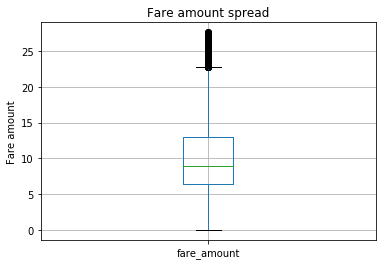

In [40]:
#consistent fare amount plot
df.boxplot(column='fare_amount')
plt.title('Fare amount spread')
plt.ylabel('Fare amount')
plt.show()

In [41]:
#removing inconsistency in trip distance
df = df.loc[(df['trip_distance']<trip_upper_lim) & (df['trip_distance']>trip_lower_lim) & (df['trip_distance']>0)]

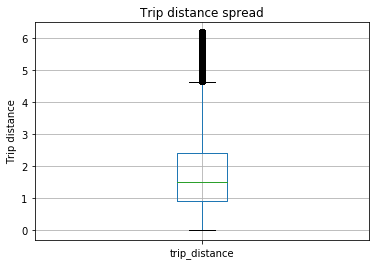

In [42]:
#Consistent Tripdistance plot
df.boxplot(column='trip_distance')
plt.title('Trip distance spread')
plt.ylabel('Trip distance')
plt.show()

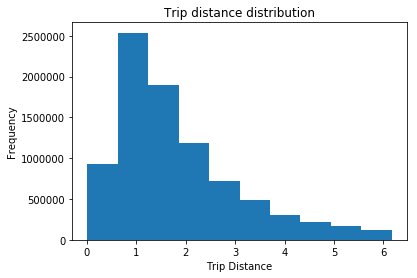

In [43]:
df['trip_distance'].plot.hist()
plt.xlabel('Trip Distance')
plt.title('Trip distance distribution')
plt.show()
#default bins = 10

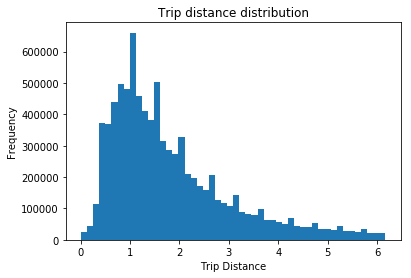

In [44]:
#increasing bins to 50
df['trip_distance'].plot.hist(bins = 50)
plt.xlabel('Trip Distance')
plt.title('Trip distance distribution')
plt.show()
#The nature of the plot remains the same, but there are slight increases periodically as well

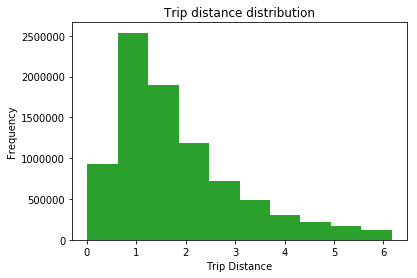

In [48]:
#normalizing 
df['trip_distance'].plot.hist(normed=1)
plt.xlabel('Trip Distance')
plt.title('Trip distance distribution')
plt.show()
#Exponentially decreases

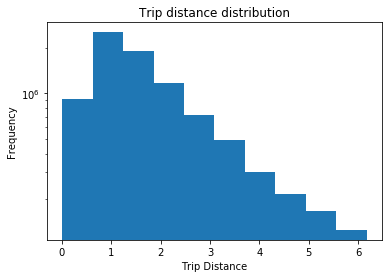

In [50]:
#Using logarithmic scale in Y axis
ax = df['trip_distance'].plot.hist()
ax.set_yscale('log')
plt.xlabel('Trip Distance')
plt.title('Trip distance distribution')
plt.show()
#Linear decrease

In [51]:
median_trip_distance_per_passenger_count = df.groupby('passenger_count')['trip_distance'].median()
print(median_trip_distance_per_passenger_count)

passenger_count
0    1.400
1    1.470
2    1.500
3    1.510
4    1.560
5    1.510
6    1.490
7    0.305
8    1.800
9    0.800
Name: trip_distance, dtype: float64


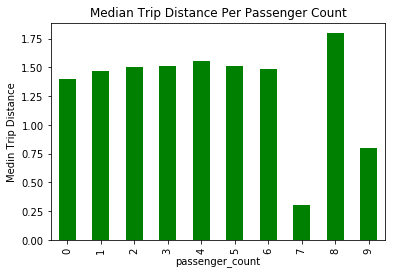

In [57]:
median_trip_distance_per_passenger_count.plot.bar(color = 'g', width = 0.5)
plt.ylabel('Medin Trip Distance')
plt.title('Median Trip Distance Per Passenger Count')
plt.show()

In [61]:
df['payment_type_text'] = 1
condition = df['payment_type'] == 2
df.loc[condition, 'payment_type_text'] = 'Cash'
df.loc[~condition, 'payment_type_text'] = 'Other'
print(df[['payment_type', 'payment_type_text']].head(10))

          payment_type payment_type_text
VendorID                                
1                    2              Cash
1                    1             Other
1                    1             Other
2                    1             Other
2                    1             Other
1                    2              Cash
1                    1             Other
1                    2              Cash
1                    1             Other
1                    1             Other


In [62]:
print('The correlation between no tip and paying cash = {}'.format((df['payment_type'] == 2).corr(df['tip_amount'] == 0)))

The correlation between no tip and paying cash = 0.929186543847
